In [1]:
import pandas as pd
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.offline
import numpy as np
from pprint import pprint

# Loading the data

In [2]:
data_path = 'data/phosphorylation_data.txt'
df = pd.read_csv(data_path, delim_whitespace=True)

'''
print(df.info())
print(df.shape)
print(df.head(8))
'''

n_clusters = 50

data = df.iloc[:, 1:19].copy()
data_basal = df.iloc[:, 1:9].copy()
data_luminal = df.iloc[:, 10:19].copy()
labels = df.iloc[:, 0].copy()

# Basal data dendogram using euclidean distance

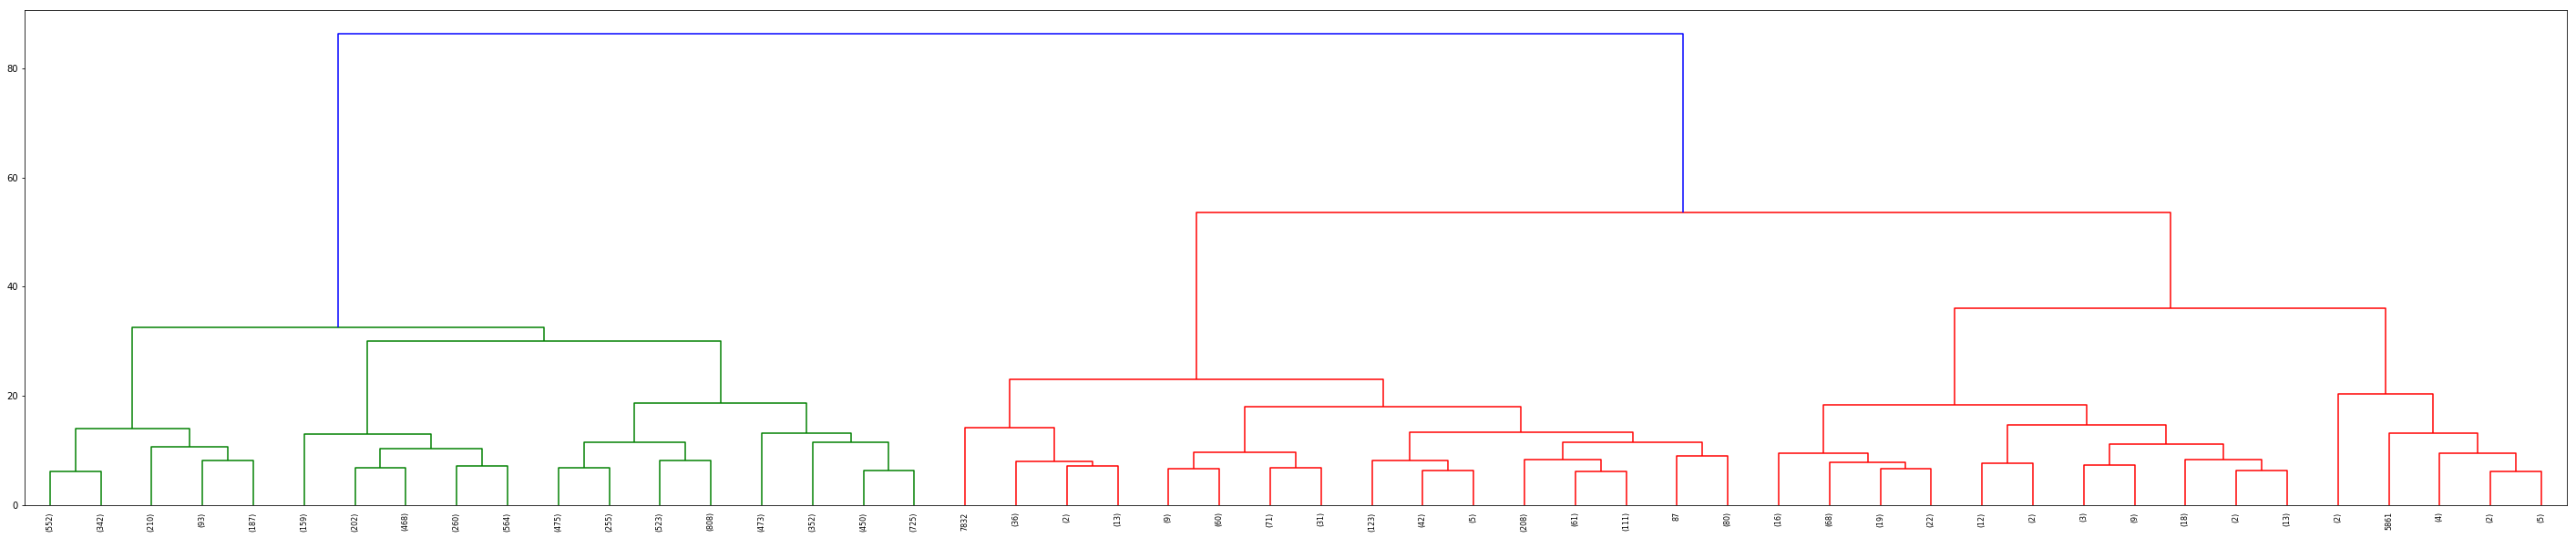

In [3]:
H = linkage(data_basal, 'ward')
fig = plt.figure(figsize=(50, 10))

dn = dendrogram(H, truncate_mode='lastp', p=n_clusters)

# Basal data dendogram using correlation

         Basal   Basal.1   Basal.2   Basal.3   Basal.4   Basal.5   Basal.6  \
0     1.124279  1.074004  0.812816  0.998615  0.966606  0.844986  1.104964   
1     1.209994  1.104199  0.852044  1.012555  0.835667  0.999307  1.199971   
2     0.946058  1.065108  1.209994  0.594192  0.588861  1.018891  1.173648   
3     0.965267  0.847920  0.681129  1.038859  0.791137  0.641268  0.847920   
4     1.766630  2.259494  2.086377  0.823591  0.863938  2.057653  1.896054   
5     0.969962  0.974004  0.871758  1.022429  1.053361  0.971307  1.047536   
6     1.016775  1.085982  1.091264  0.787854  0.764188  0.983502  1.101905   
7     1.046085  0.976032  0.933680  0.951318  0.954621  1.044636  1.010451   
8     1.071031  0.934975  0.831046  0.985549  0.959929  0.898755  0.990343   
9     0.987601  0.937571  0.970634  0.837406  0.960595  1.063633  1.118062   
10    1.182631  0.980779  0.922103  1.119613  1.383191  0.980779  0.931095   
11    0.847920  1.100379  1.125839  0.595428  0.742776  1.011152

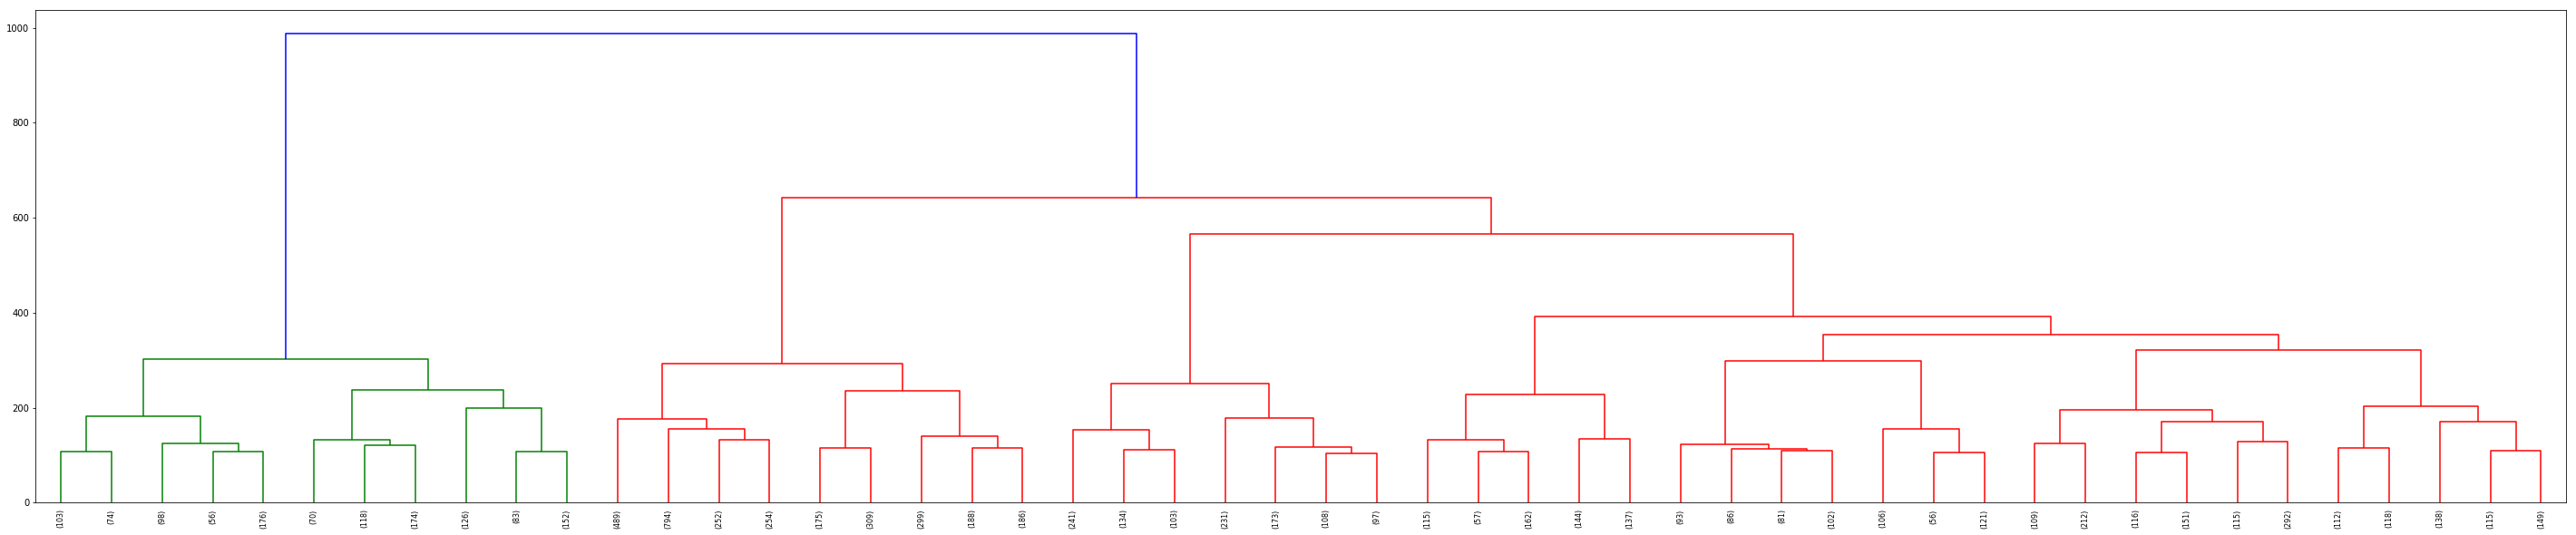

In [5]:
print(data_basal)
correlation = np.square(np.triu(np.corrcoef(data_basal)))
print(correlation)
condensed_matrix = correlation #ssd.squareform(correlation)

H = linkage(condensed_matrix, 'ward')
fig = plt.figure(figsize=(50, 10))

dn = dendrogram(H, truncate_mode='lastp', p=n_clusters)

# Luminal data dendogram using euclidean distance

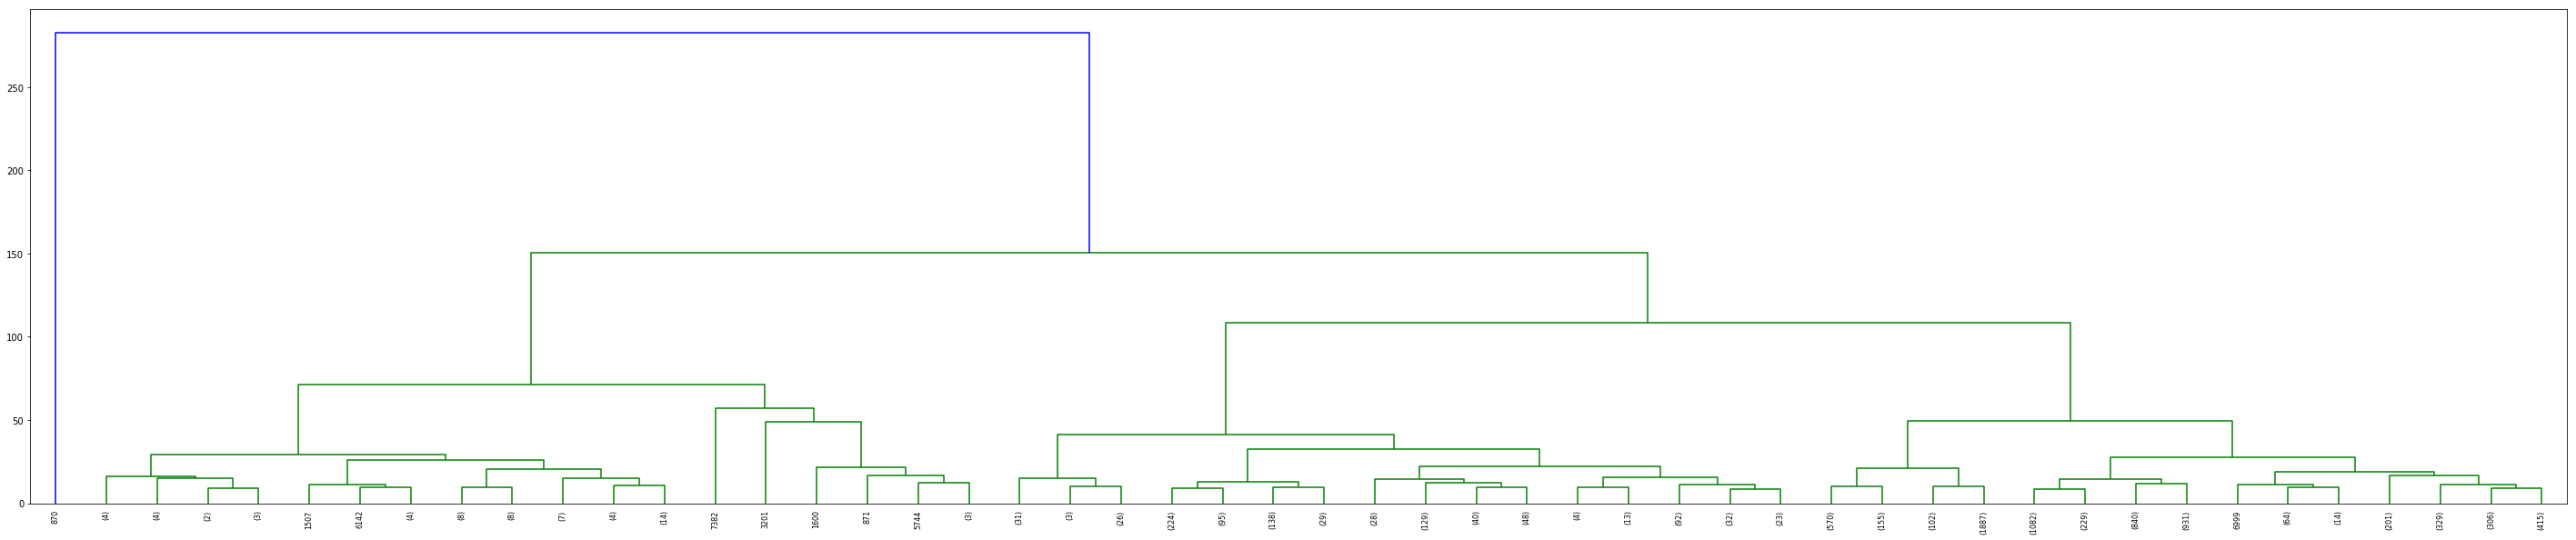

In [47]:
H = linkage(data_luminal, 'ward')
fig = plt.figure(figsize=(50, 10))

dn = dendrogram(H, truncate_mode='lastp', p=n_clusters)

# Luminal data dendogram using correlation

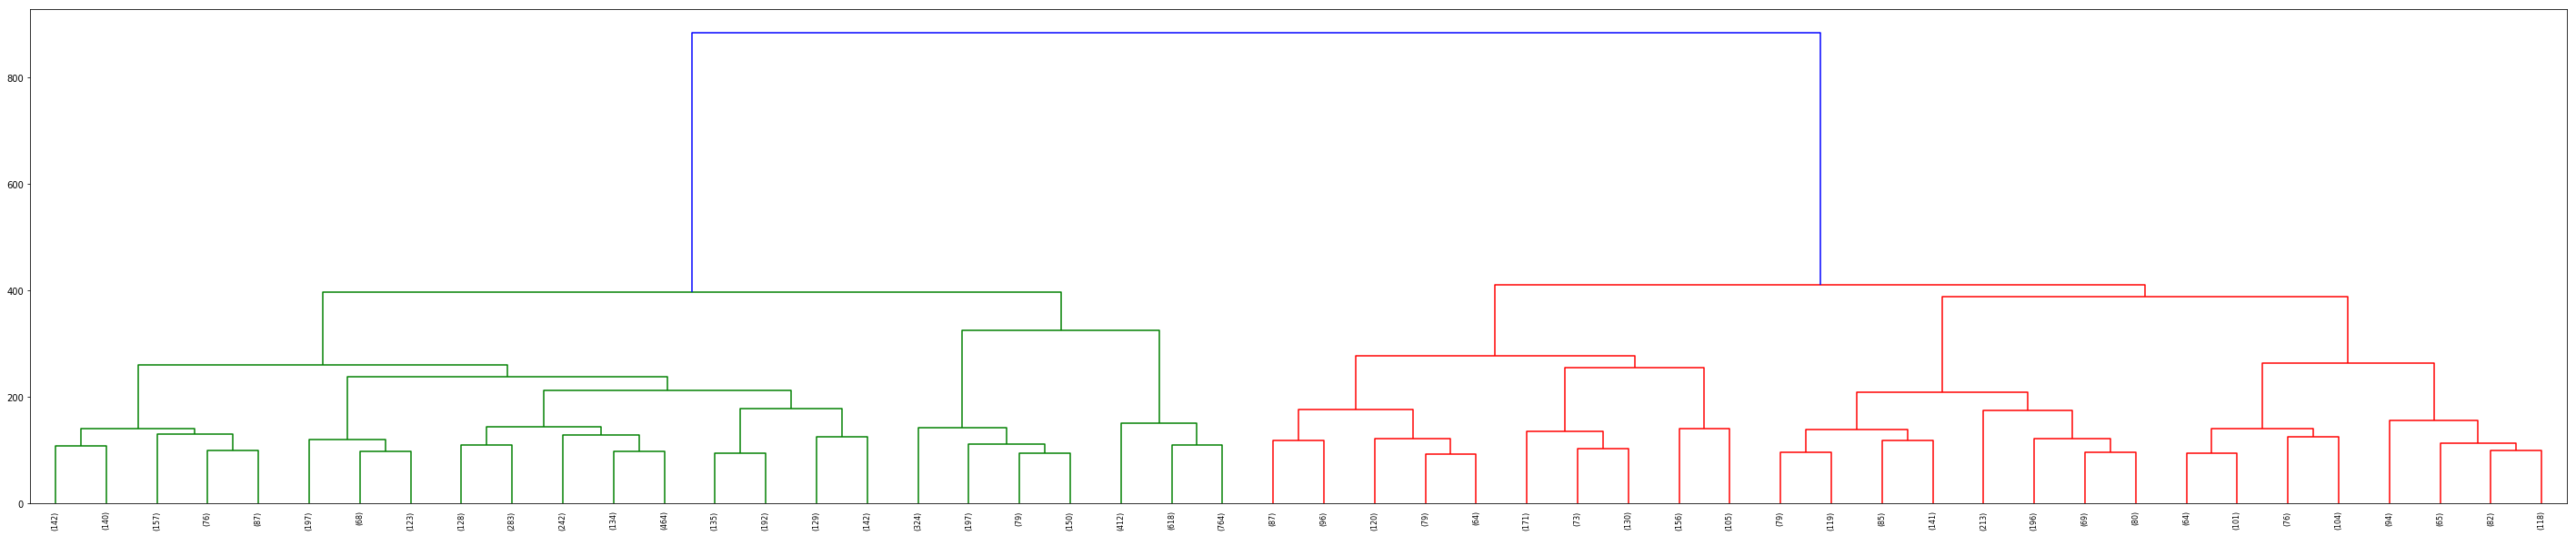

In [48]:
correlation = np.square(np.triu(np.corrcoef(data_luminal)))
#pprint(correlation)
condensed_matrix = correlation #ssd.squareform(correlation)

H = linkage(condensed_matrix, 'ward')
fig = plt.figure(figsize=(50, 10))

dn = dendrogram(H, truncate_mode='lastp', p=n_clusters)

# Luminal and Basal dendogram using euclidean distance

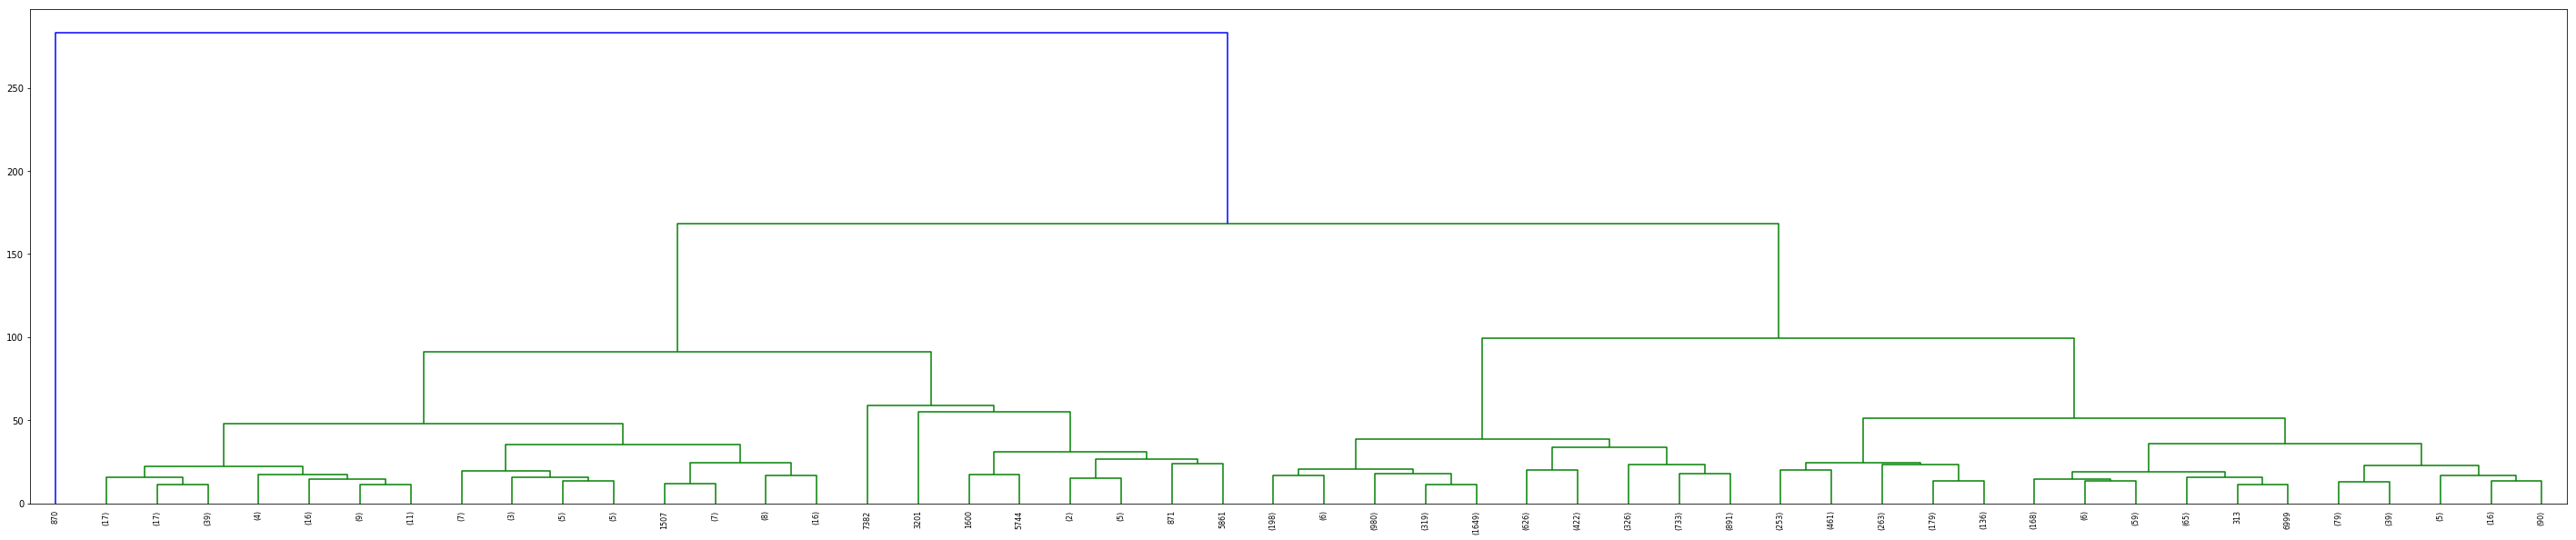

In [49]:
H = linkage(data, 'ward')
fig = plt.figure(figsize=(50, 10))

dn = dendrogram(H, truncate_mode='lastp', p=n_clusters)

# Luminal and Basal data dendogram using correlation

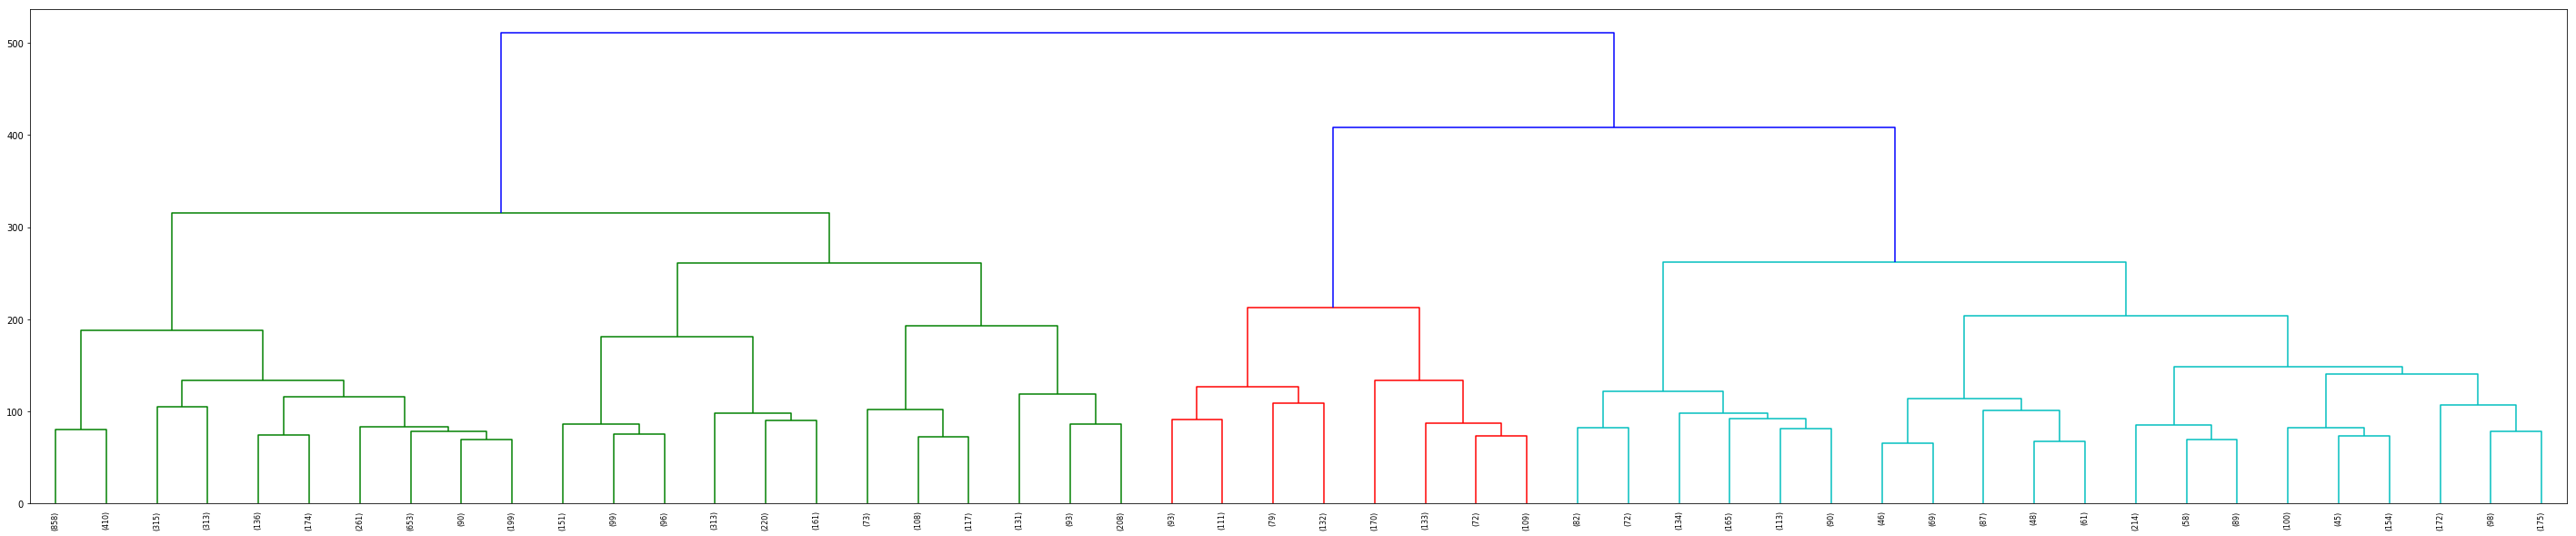

In [50]:
correlation = np.square(np.triu(np.corrcoef(data)))
#pprint(correlation)
condensed_matrix = correlation #ssd.squareform(correlation)

H = linkage(condensed_matrix, 'ward')
fig = plt.figure(figsize=(50, 10))

dn = dendrogram(H, truncate_mode='lastp', p=n_clusters)

# Basal data euclidean distance silhouette score

In [62]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score

x = data_basal

cluster_obj = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=n_clusters,
            pooling_func='deprecated').fit(x)

y = cluster_obj.labels_

preds = cluster_obj.fit_predict(x, y)
s_score = silhouette_score(data, preds, metric='euclidean')

h_score = homogeneity_score(y, preds)

print ("For n_clusters = {}\nsilhouette score is {}\nhomogeneity score is {}\n".format(n_clusters, s_score, h_score))

For n_clusters = 50
silhouette score is -0.055103985941692524
homogeneity score is 1.0



# Basal data correlation silhouette and homogeneity score

In [63]:
x = np.square(np.triu(np.corrcoef(data_basal)))

cluster_obj = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=n_clusters,
            pooling_func='deprecated').fit(x)

y = cluster_obj.labels_

preds = cluster_obj.fit_predict(x, y)
s_score = silhouette_score(data, preds, metric='euclidean')

h_score = homogeneity_score(y, preds)

print ("For n_clusters = {}\nsilhouette score is {}\nhomogeneity score is {}\n".format(n_clusters, s_score, h_score))

For n_clusters = 50
silhouette score is -0.21088225179315684
homogeneity score is 1.0



# Luminal data euclidean distance silhouette and homogeneity score

In [64]:
x = data_luminal

cluster_obj = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=n_clusters,
            pooling_func='deprecated').fit(x)

y = cluster_obj.labels_

preds = cluster_obj.fit_predict(x, y)
s_score = silhouette_score(data, preds, metric='euclidean')

h_score = homogeneity_score(y, preds)

print ("For n_clusters = {}\nsilhouette score is {}\nhomogeneity score is {}\n".format(n_clusters, s_score, h_score))

For n_clusters = 50
silhouette score is -0.0024917092198485434
homogeneity score is 1.0



# Luminal data correlation shilouette and homogeneity score

In [65]:
x = np.square(np.triu(np.corrcoef(data_luminal)))

cluster_obj = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=n_clusters,
            pooling_func='deprecated').fit(x)

y = cluster_obj.labels_

preds = cluster_obj.fit_predict(x, y)
s_score = silhouette_score(data, preds, metric='euclidean')

h_score = homogeneity_score(y, preds)

print ("For n_clusters = {}\nsilhouette score is {}\nhomogeneity score is {}\n".format(n_clusters, s_score, h_score))

For n_clusters = 50
silhouette score is -0.2202618597827473
homogeneity score is 1.0



# Luminal and Basal data euclidean distance silhouette and homogeneity score

In [ ]:
x = data

cluster_obj = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=n_clusters,
            pooling_func='deprecated').fit(x)

y = cluster_obj.labels_

preds = cluster_obj.fit_predict(x, y)
s_score = silhouette_score(x, preds, metric='euclidean')

h_score = homogeneity_score(y, preds)

print ("For n_clusters = {}\nsilhouette score is {}\nhomogeneity score is {}\n".format(n_clusters, s_score, h_score))

# Luminal and Basal correlation silhouette and homogeneity score

In [ ]:
x = np.square(np.triu(np.corrcoef(data)))

cluster_obj = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=n_clusters,
            pooling_func='deprecated').fit(x)

y = cluster_obj.labels_

preds = cluster_obj.fit_predict(x, y)
s_score = silhouette_score(x, preds, metric='euclidean')

h_score = homogeneity_score(y, preds)

print ("For n_clusters = {}\nsilhouette score is {}\nhomogeneity score is {}\n".format(n_clusters, s_score, h_score))